In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [3]:
path = "C:/Users/prash/Downloads/STOCK MARKET/"

In [4]:
stock = 'ASIANPAINT'

In [5]:
share_price = pd.read_csv(path + "MONTHLY SHARE PRICES/" + stock + ".csv")

share_price['Year'] = pd.to_datetime(share_price['Date']).dt.to_period('Y')

In [6]:
share_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2014-12-22,731.200012,747.700012,731.200012,745.549988,717.982178,1029222,2014
1,2014-12-23,747.000000,751.000000,735.400024,739.250000,711.915161,669484,2014
2,2014-12-24,740.099976,743.200012,725.150024,728.450012,701.514526,2337291,2014
3,2014-12-26,732.000000,738.000000,722.000000,727.049988,700.166260,525701,2014
4,2014-12-29,728.849976,759.299988,728.849976,757.549988,729.538452,865233,2014


### Visualize per day Closing price of Stock 

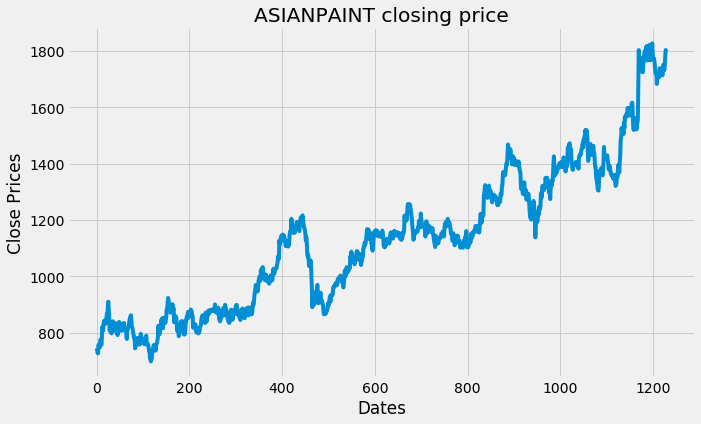

In [7]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(share_price['Close'])
plt.title(stock + ' closing price')
plt.show()

### Scatterplot of Closing Price 

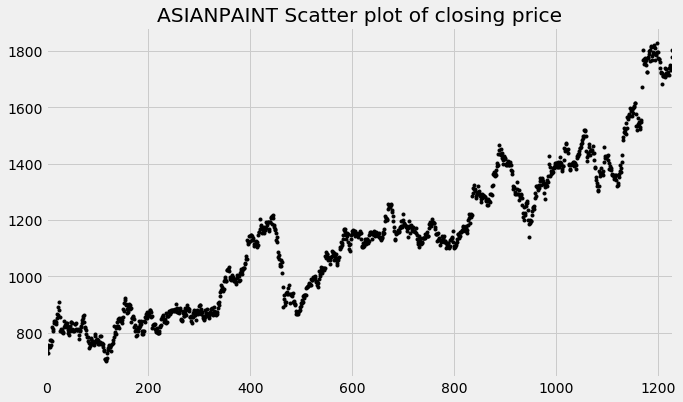

In [8]:
df_close = share_price['Close']
df_close.plot(style='k.')
plt.title(stock + ' Scatter plot of closing price')
plt.show()

### Checking for Stationarity 

In [9]:
#Test for stationarity
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    


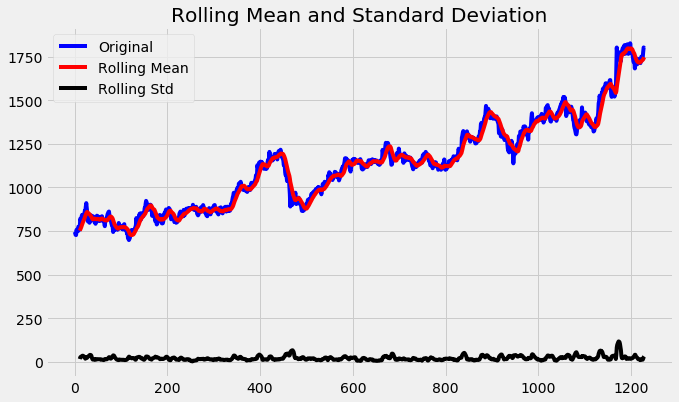

Results of dickey fuller test
Test Statistics                  -0.212073
p-value                           0.937067
No. of lags used                  0.000000
Number of observations used    1228.000000
critical value (1%)              -3.435686
critical value (5%)              -2.863896
critical value (10%)             -2.568025
dtype: float64


In [10]:
test_stationarity(df_close)

### Separate Trend and Seasonality from Time Series 

<Figure size 720x432 with 0 Axes>

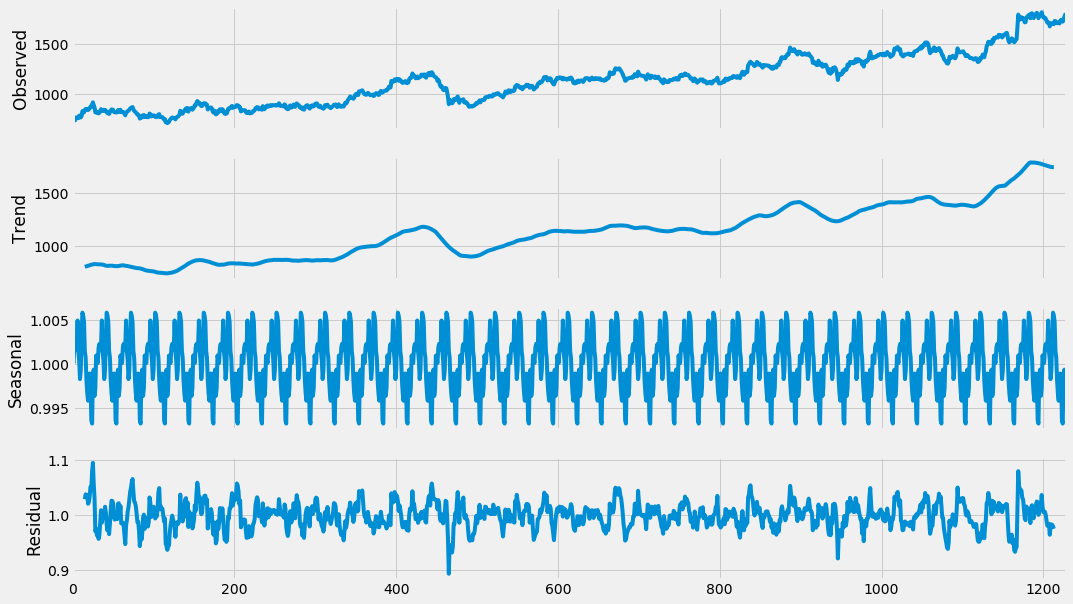

In [11]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


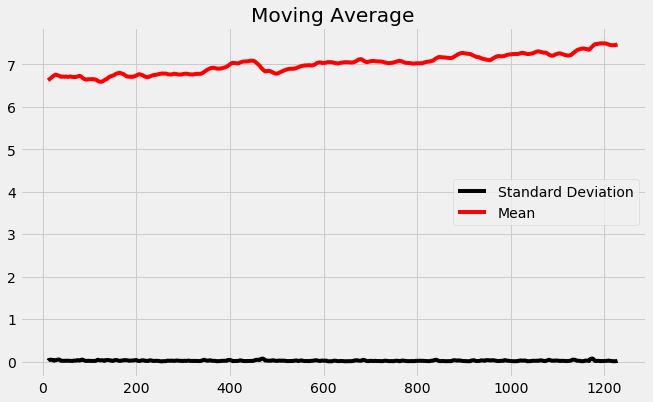

In [12]:

df_log = np.log(df_close)

moving_avg = df_log.rolling(12).mean()

std_dev = df_log.rolling(12).std()

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

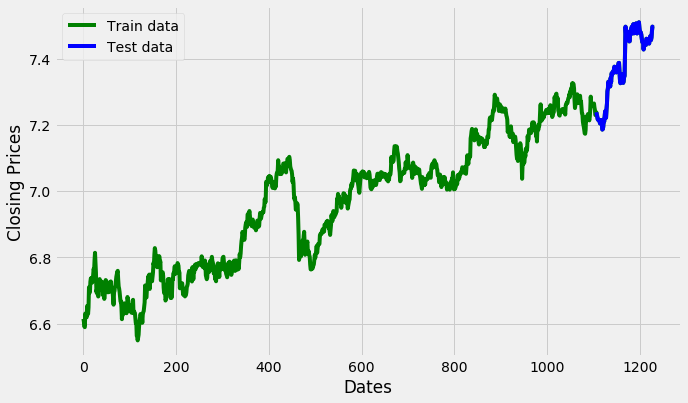

In [13]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [14]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=-465.068, BIC=-455.057, Fit time=0.370 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=-6083.782, BIC=-6068.764, Fit time=0.477 seconds
Near non-invertible roots for order (1, 0, 0)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=-1867.948, BIC=-1852.931, Fit time=0.667 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=7414.965, BIC=7419.971, Fit time=0.040 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=-6085.533, BIC=-6065.509, Fit time=0.506 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=-6082.385, BIC=-6057.356, Fit time=0.848 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 0); AIC=-6083.829, BIC=-6058.800, Fit time=0.745 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 0); AIC=-2927.544, BIC=-2907.52

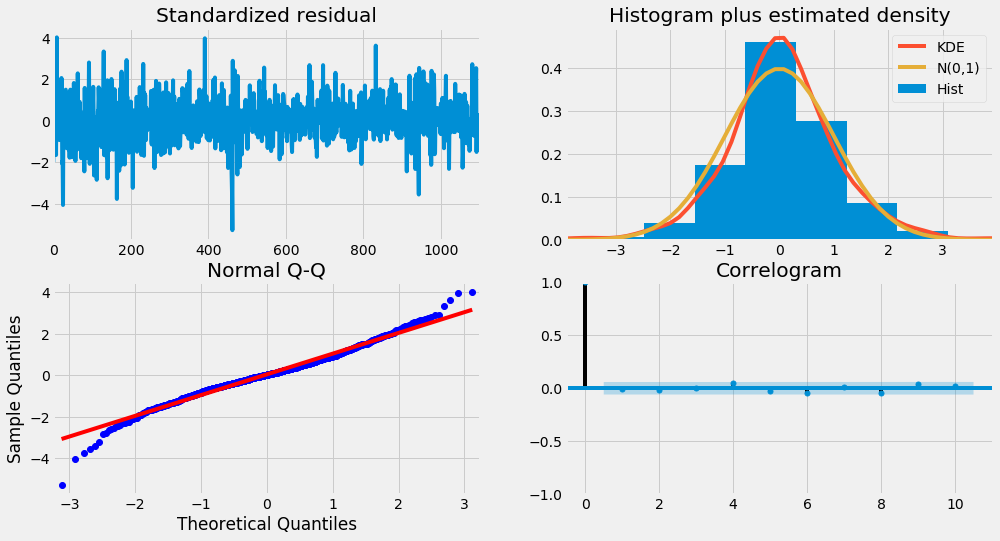

In [15]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [16]:
model = ARIMA(train_data, order=(2,0,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1103
Model:                     ARMA(2, 0)   Log Likelihood                3047.237
Method:                       css-mle   S.D. of innovations              0.015
Date:                Sat, 01 Feb 2020   AIC                          -6086.474
Time:                        21:46:58   BIC                          -6066.451
Sample:                             0   HQIC                         -6078.901
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.9375      0.179     38.850      0.000       6.588       7.288
ar.L1.Close     0.9400      0.030     31.229      0.000       0.881       0.999
ar.L2.Close     0.0582      0.030      1.931    

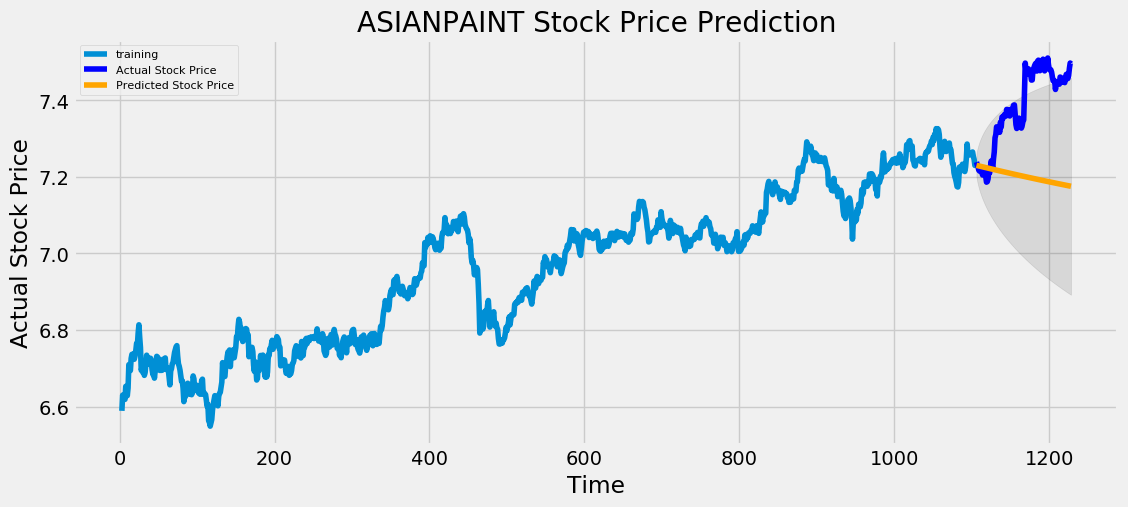

In [17]:
# Forecast
fc, se, conf = fitted.forecast(123, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title(stock + ' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [18]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.04659039748177624
MAE: 0.18729129987626197
RMSE: 0.21584808889998597
MAPE: 0.025169440980456446
